# Create the cluster files for EBLSST

I compiled the open cluster catalog here: https://github.com/ageller/compileOCs , and the globular clusters here: https://github.com/ageller/compileGCs .

Now I will fill in the blanks with mean values.

I need the following columns:

```
ID, RA[hr], Dec[deg], dist[pc], rhm[pc], mass[Msun], age[Myr], [Fe/H], sigma_v0_z[km/s], OpSimID, OpSimRA[deg], OpSimDec[deg]
```

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

from astropy import units, constants
from astropy.coordinates import SkyCoord

import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from OpSim import OpSim

import matplotlib.pyplot as plt
%matplotlib inline


## OpSim info

In [2]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'

In [3]:
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


## Open Clusters

In [4]:
OCin_df = pd.read_csv('OCcompiled_clean.csv')
OCin_df

,ID,RA,Dec,ID_Simbad,ID_MWSC,ID_WEBDA,ID_Piskunov,ID_Kharchenko,ID_Salaris,ID_vandenBergh,ID_Cantat-Gaudin,ID_Lynga,dist[pc],err_dist[pc],N_dist[pc],age[Myr],err_age[Myr],N_age[Myr],[Fe/H],err_[Fe/H],N_[Fe/H],mass[Msun],err_mass[Msun],N_mass[Msun],rgc[pc],err_rgc[pc],N_rgc[pc],rhm[pc],err_rhm[pc],N_rhm[pc]
0,[KPS2012]_MWSC_4688,23 51 54.000,-86 43 12.000,[KPS2012]_MWSC_4688,MWSC_4688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1336.0,0.0,1.0,2454.708916,0.0,1.0,NaN,NaN,NaN,28.5,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,[KPS2012]_MWSC_5684,12 53 43.000,-86 38 54.000,NaN,MWSC_5684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432.0,0.0,1.0,1513.561248,0.0,1.0,NaN,NaN,NaN,26.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,[KPS2012]_MWSC_5692,17 47 20.000,-86 36 36.000,NaN,MWSC_5692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1555.0,0.0,1.0,851.138038,0.0,1.0,NaN,NaN,NaN,14.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,[KPS2012]_MWSC_4005,00 11 28.000,-85 28 48.000,[KPS2012]_MWSC_4005,MWSC_4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1159.0,0.0,1.0,2371.373706,0.0,1.0,NaN,NaN,NaN,21.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,[KPS2012]_MWSC_4176,14 27 18.000,-85 25 12.000,[KPS2012]_MWSC_4176,MWSC_4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,0.0,1.0,2065.380156,0.0,1.0,NaN,NaN,NaN,77.5,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,C_0845-527,08 46 27.706,-52 54 03.240,C_0845-527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vdBergh-Hagen_52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,Av-hunter_1,23 37 13.898,48 24 36.756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Av-hunter_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3350,Latysev_1,02 52 27.202,27 28 16.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latysev_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3351,Cl_Basel_11,07 17 06.074,-13 57 26.100,Cl_Basel_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basel_11,NaN,NaN,NaN,316.227766,0.0,1.0,NaN,NaN,NaN,15.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
OCout_df = OCin_df[['ID','RA','Dec','dist[pc]','rhm[pc]','mass[Msun]','age[Myr]','[Fe/H]']].copy()
OCout_df.rename(columns = {'RA':'RA[hr]','Dec':'Dec[deg]'}, inplace=True)

OCout_df

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H]
0,[KPS2012]_MWSC_4688,23 51 54.000,-86 43 12.000,1336.0,NaN,28.5,2454.708916,NaN
1,[KPS2012]_MWSC_5684,12 53 43.000,-86 38 54.000,1432.0,NaN,26.0,1513.561248,NaN
2,[KPS2012]_MWSC_5692,17 47 20.000,-86 36 36.000,1555.0,NaN,14.0,851.138038,NaN
3,[KPS2012]_MWSC_4005,00 11 28.000,-85 28 48.000,1159.0,NaN,21.0,2371.373706,NaN
4,[KPS2012]_MWSC_4176,14 27 18.000,-85 25 12.000,1093.0,NaN,77.5,2065.380156,NaN
...,...,...,...,...,...,...,...,...
3348,C_0845-527,08 46 27.706,-52 54 03.240,NaN,NaN,NaN,NaN,NaN
3349,Av-hunter_1,23 37 13.898,48 24 36.756,NaN,NaN,5.0,NaN,NaN
3350,Latysev_1,02 52 27.202,27 28 16.068,NaN,NaN,NaN,NaN,NaN
3351,Cl_Basel_11,07 17 06.074,-13 57 26.100,NaN,NaN,15.0,316.227766,NaN


In [6]:
#means
mAge = np.mean(OCout_df['age[Myr]'].loc[~pd.isna(OCout_df['age[Myr]'])])
mMass = np.mean(OCout_df['mass[Msun]'].loc[~pd.isna(OCout_df['mass[Msun]'])])
mRhm = np.mean(OCout_df['rhm[pc]'].loc[~pd.isna(OCout_df['rhm[pc]'])])
mFeH = np.mean(OCout_df['[Fe/H]'].loc[~pd.isna(OCout_df['[Fe/H]'])])
mDist = np.mean(OCout_df['dist[pc]'].loc[~pd.isna(OCout_df['dist[pc]'])])

In [7]:
#replace the nan values with the means
OCout_df.loc[pd.isna(OCout_df['age[Myr]']), 'age[Myr]'] = mAge
OCout_df.loc[pd.isna(OCout_df['mass[Msun]']), 'mass[Msun]'] = mMass
OCout_df.loc[pd.isna(OCout_df['rhm[pc]']), 'rhm[pc]'] = mRhm
OCout_df.loc[pd.isna(OCout_df['[Fe/H]']), '[Fe/H]'] = mFeH
OCout_df.loc[pd.isna(OCout_df['dist[pc]']), 'dist[pc]'] = mDist

In [8]:
OCout_df

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H]
0,[KPS2012]_MWSC_4688,23 51 54.000,-86 43 12.000,1336.000000,3.207156,28.500000,2454.708916,-0.497417
1,[KPS2012]_MWSC_5684,12 53 43.000,-86 38 54.000,1432.000000,3.207156,26.000000,1513.561248,-0.497417
2,[KPS2012]_MWSC_5692,17 47 20.000,-86 36 36.000,1555.000000,3.207156,14.000000,851.138038,-0.497417
3,[KPS2012]_MWSC_4005,00 11 28.000,-85 28 48.000,1159.000000,3.207156,21.000000,2371.373706,-0.497417
4,[KPS2012]_MWSC_4176,14 27 18.000,-85 25 12.000,1093.000000,3.207156,77.500000,2065.380156,-0.497417
...,...,...,...,...,...,...,...,...
3348,C_0845-527,08 46 27.706,-52 54 03.240,2866.792019,3.207156,527.610711,1215.635057,-0.497417
3349,Av-hunter_1,23 37 13.898,48 24 36.756,2866.792019,3.207156,5.000000,1215.635057,-0.497417
3350,Latysev_1,02 52 27.202,27 28 16.068,2866.792019,3.207156,527.610711,1215.635057,-0.497417
3351,Cl_Basel_11,07 17 06.074,-13 57 26.100,2866.792019,3.207156,15.000000,316.227766,-0.497417


### Calculate the central velocity dispersion, using a Plummer model

In [21]:
print(mMass)

527.6107114884343


In [9]:
rpl = OCout_df['rhm[pc]'].values*units.pc*(2**(2./3.) - 1.)**0.5
print(rpl)
sigma0_z = ((3.*np.pi/64. * constants.G*OCout_df['mass[Msun]'].values*units.solMass/rpl)**0.5).decompose().to(units.km/units.s)
print(sigma0_z)
OCout_df['sigma_v0_z[km/s]'] = sigma0_z.value

[2.45803174 2.45803174 2.45803174 ... 2.45803174 2.45803174 2.45803174] pc
[0.08569487 0.08185007 0.06006153 ... 0.36871362 0.06216959 0.36871362] km / s


### Add the OpSim field

In [10]:
OpSimCoords = SkyCoord(ra = OpS.RA*units.degree, dec = OpS.Dec*units.degree)
clusterCoords = SkyCoord(ra = OCout_df['RA[hr]'].values, dec = OCout_df['Dec[deg]'].values, unit=(units.hour, units.degree))
idx, d2d, d3d = clusterCoords.match_to_catalog_sky(OpSimCoords)

In [11]:
# quick test to make sure that I understand how match_to_catalog_sky works
# the LSST FoV is 3.5 degrees, so the max offset that I should see is 1.75 degrees
i = 6
print(idx[i])
print(clusterCoords[i])
print(OpSimCoords[idx[i]])
print(d2d[i].degree)

idxtest, d2dtest, d3dtest = clusterCoords[i].match_to_catalog_sky(OpSimCoords)
print('\n',idxtest, d2dtest.degree)

print('\n', max(d2d.degree))

22
<SkyCoord (ICRS): (ra, dec) in deg
    (235.55833333, -83.195)>
<SkyCoord (ICRS): (ra, dec) in deg
    (228.855395, -82.798725)>
0.9075489268017065

 22 [0.90754893]

 1.7305555364007168


In [12]:
OCout_df['OpSimID'] = OpS.fieldID[idx]
OCout_df['OpSimRA[deg]'] = OpS.RA[idx]
OCout_df['OpSimDec[deg]'] = OpS.Dec[idx]

## Select only the Open Clusters within at least 1 expected EB

Also exclude the GCs

In [26]:
obsRat = 0.05 #roughly the fraction expected for detached EBs
fb = 0.5
meanMass = 0.5 #assumed mean stellar mass, to get a total N stars in the cluster
OCout_df_use = OCout_df.loc[OCout_df['mass[Msun]']/meanMass*fb*obsRat >= 1]

GCin_df = pd.read_csv('GCcompiled.csv')
GCIDs = np.append(GCin_df['ID'].values, GCin_df['otherName_harris'].dropna().values)
#GCIDs = GCin_df['ID'].unique()
GCIDs = [x.replace(" ", "_") for x in GCIDs]
badIndices = []
for index, row in OCout_df_use.iterrows():
    if (row['ID'] in GCIDs):
        print('GC in OC list', row['ID'])
        badIndices.append(index)
OCout_df_use = OCout_df_use.drop(badIndices)
print(len(OCout_df), len(OCout_df_use))
check = OCout_df_use.loc[OCout_df_use['mass[Msun]'] > 1e4]
print(GCIDs)
print(check)

GC in OC list NGC_104
GC in OC list NGC_362
GC in OC list NGC_1851
GC in OC list M_79
GC in OC list NGC_3201
GC in OC list NGC_4372
GC in OC list M_68
GC in OC list NGC_4833
GC in OC list M_53
GC in OC list NGC_5139
GC in OC list M_3
GC in OC list NGC_5286
GC in OC list IC_4499
GC in OC list NGC_5824
GC in OC list NGC_5897
GC in OC list M_5
GC in OC list NGC_5927
GC in OC list NGC_5946
GC in OC list NGC_5986
GC in OC list M_80
GC in OC list M_4
GC in OC list NGC_6101
GC in OC list NGC_6144
GC in OC list NGC_6139
GC in OC list M_107
GC in OC list M_13
GC in OC list M_12
GC in OC list NGC_6235
GC in OC list M_10
GC in OC list NGC_6256
GC in OC list M_62
GC in OC list M_19
GC in OC list NGC_6284
GC in OC list NGC_6287
GC in OC list NGC_6293
GC in OC list NGC_6304
GC in OC list NGC_6316
GC in OC list M_92
GC in OC list NGC_6325
GC in OC list M_9
GC in OC list NGC_6342
GC in OC list NGC_6356
GC in OC list NGC_6355
GC in OC list NGC_6352
GC in OC list NGC_6366
GC in OC list NGC_6362
GC in OC

In [19]:
OCIDs = OCout_df_use['ID'].unique()
for index, row in OCout_df.iterrows():
    if (row['ID'] not in OCIDs):
        print('mv ../output_files/'+row['ID']+'__output_file.csv .')


mv ../output_files/[KPS2012]_MWSC_5572__output_file.csv .
mv ../output_files/NGC_1520__output_file.csv .
mv ../output_files/[SSW94]_d__output_file.csv .
mv ../output_files/Kronberger_39__output_file.csv .
mv ../output_files/Shorlin_2__output_file.csv .
mv ../output_files/C_1107-602__output_file.csv .
mv ../output_files/Cl_Sher_1__output_file.csv .
mv ../output_files/C_1107-588__output_file.csv .
mv ../output_files/C_1056-587__output_file.csv .
mv ../output_files/[DBS2003]_40__output_file.csv .
mv ../output_files/[DBS2003]_170__output_file.csv .
mv ../output_files/[DBS2003]_36__output_file.csv .
mv ../output_files/[DBS2003]_34__output_file.csv .
mv ../output_files/[DBS2003]_169__output_file.csv .
mv ../output_files/[DBS2003]_171__output_file.csv .
mv ../output_files/C_0838-459__output_file.csv .
mv ../output_files/ESO_252-14__output_file.csv .
mv ../output_files/[KPS2012]_MWSC_5604__output_file.csv .
mv ../output_files/[KPS2012]_MWSC_1608__output_file.csv .
mv ../output_files/[DBS2003]_

### Save to file

In [27]:
print(min(OCout_df_use['mass[Msun]'])/0.5)

40.0


In [28]:
OCout_df_use.to_csv('OCdataForEBLSST.csv', index=False)
OCout_df.to_csv('OCdataForEBLSST_ALL.csv', index=False)
OCout_df_use

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s],OpSimID,OpSimRA[deg],OpSimDec[deg]
0,[KPS2012]_MWSC_4688,23 51 54.000,-86 43 12.000,1336.000000,3.207156,28.500000,2454.708916,-0.497417,0.085695,9.0,0.000000,-85.272892
1,[KPS2012]_MWSC_5684,12 53 43.000,-86 38 54.000,1432.000000,3.207156,26.000000,1513.561248,-0.497417,0.081850,2.0,180.000000,-87.568555
3,[KPS2012]_MWSC_4005,00 11 28.000,-85 28 48.000,1159.000000,3.207156,21.000000,2371.373706,-0.497417,0.073560,9.0,0.000000,-85.272892
4,[KPS2012]_MWSC_4176,14 27 18.000,-85 25 12.000,1093.000000,3.207156,77.500000,2065.380156,-0.497417,0.141313,7.0,215.999822,-85.272913
5,ESO_8-6,14 56 55.000,-83 26 42.000,1380.000000,1.217844,39.000000,1995.262315,-0.497417,0.162678,23.0,228.855395,-82.798725
...,...,...,...,...,...,...,...,...,...,...,...,...
3342,C_2017+375,20 19 15.264,37 44 28.860,2866.792019,3.207156,527.610711,1215.635057,-0.497417,0.368714,4304.0,305.663578,38.889236
3346,NGC_7023,21 00 30.504,68 09 49.356,2866.792019,3.207156,527.610711,1215.635057,-0.497417,0.368714,5101.0,311.027239,68.155006
3348,C_0845-527,08 46 27.706,-52 54 03.240,2866.792019,3.207156,527.610711,1215.635057,-0.497417,0.368714,533.0,131.349823,-52.971762
3350,Latysev_1,02 52 27.202,27 28 16.068,2866.792019,3.207156,527.610711,1215.635057,-0.497417,0.368714,3921.0,42.426985,28.759876


### Some plots

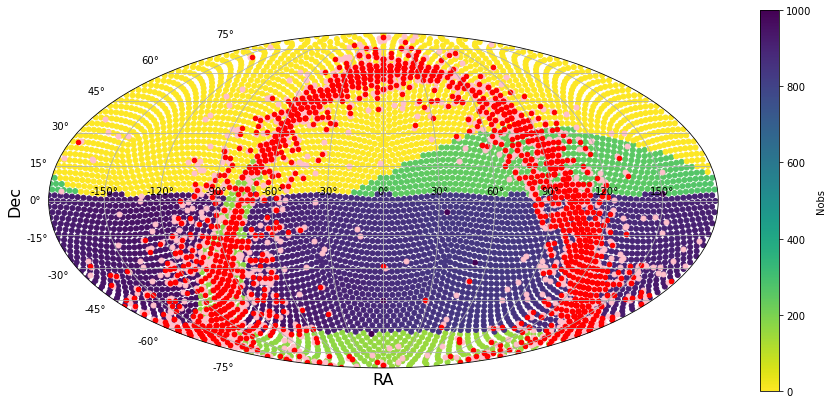

In [29]:
OpSimRAwrap = OpSimCoords.ra.wrap_at(180.*units.degree).degree
OpSimDecwrap = OpSimCoords.dec.wrap_at(180.*units.degree).degree

clusterRAwrap = clusterCoords.ra.wrap_at(180.*units.degree).degree
clusterDecwrap = clusterCoords.dec.wrap_at(180.*units.degree).degree

clusterCoordsO = SkyCoord(ra = OCout_df_use['OpSimRA[deg]'].values*units.degree, 
                          dec = OCout_df_use['OpSimDec[deg]'].values*units.degree)
clusterRAwrapO = clusterCoordsO.ra.wrap_at(180.*units.degree).degree
clusterDecwrapO = clusterCoordsO.dec.wrap_at(180.*units.degree).degree

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, figsize=(15,10))
ax.grid(True)
ax.set_xlabel("RA",fontsize=16)
ax.set_ylabel("Dec",fontsize=16)
mlw = ax.scatter(np.array(OpSimRAwrap).ravel()*np.pi/180., 
                 np.array(OpSimDecwrap).ravel()*np.pi/180., 
                 c=OpS.Nobs, #probably want this in a given filter, but that takes a long time to gather
                 cmap='viridis_r', s = 25, vmin=0, vmax=1000)
ax.scatter(np.array(clusterRAwrap).ravel()*np.pi/180., 
                 np.array(clusterDecwrap).ravel()*np.pi/180., color='pink', s=25)
ax.scatter(np.array(clusterRAwrapO).ravel()*np.pi/180., 
                 np.array(clusterDecwrapO).ravel()*np.pi/180., color='red', s=20)

cbar = f.colorbar(mlw, shrink=0.7)
cbar.set_label(r'Nobs')


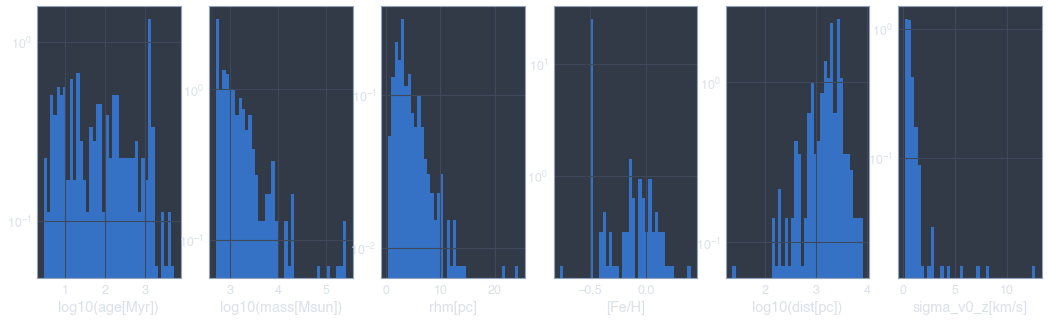

In [17]:
f,(ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(18,5))

ax1.hist(np.log10(OCout_df_use['age[Myr]'].values), bins=40, density=True)
ax1.set_xlabel('log10(age[Myr])')
ax1.set_yscale('log')

ax2.hist(np.log10(OCout_df_use['mass[Msun]'].values), bins=40, density=True)
ax2.set_xlabel('log10(mass[Msun])')
ax2.set_yscale('log')

ax3.hist(OCout_df_use['rhm[pc]'].values, bins=40, density=True)
ax3.set_xlabel('rhm[pc]')
ax3.set_yscale('log')

ax4.hist(OCout_df_use['[Fe/H]'].values, bins=40, density=True)
ax4.set_xlabel('[Fe/H]')
ax4.set_yscale('log')

ax5.hist(np.log10(OCout_df_use['dist[pc]'].values), bins=40, density=True)
ax5.set_xlabel('log10(dist[pc])')
ax5.set_yscale('log')

ax6.hist(OCout_df_use['sigma_v0_z[km/s]'].values, bins=40, density=True)
ax6.set_xlabel('sigma_v0_z[km/s]')
ax6.set_yscale('log')


## Globular Clusters

In [18]:
GCin_df = pd.read_csv('GCcompiled.csv')
GCin_df

,ID,otherName_harris,RA2000[hr]_harris,Dec2000[deg]_harris,L[deg]_harris,B[deg]_harris,R_Sun[kpc]_harris,R_gc[kpc]_harris,X[kpc]_harris,Y[kpc]_harris,Z[kpc]_harris,[Fe/H]_harris,wt_harris,E(B-V)_harris,V_HB_harris,(m-M)V_harris,V_int_harris,M_V_int_harris,(U-B)_int_harris,(B-V)_int_harris,(V-R)_int_harris,(V_I)_int_harris,specType_int_harris,ellipticity_harris,helio_rv[km/s]_harris,err_helio_rv[km/s]_harris,lsr_rv[km/s]_harris,sig_v0[km/s]_harris,err_sig_v0[km/s]_harris,King_c_harris,cc_flag_harris,r_c[arcmin]_harris,r_hl[arcmin]_harris,surface_brightness0[mag/arcsec2]_harris,luminosity_density0[Lsum/pc3]_harris,trelax(r_c)[log10(yr)]_harris,trelax(r_h)[log10(yr)]_harris,[M/H]_ZW_marinfranch,[M/H]_CG_marinfranch,MtoF606W_marinfranch,errMtoF606W_marinfranch,D07_ZW_marinfranch,errD07_ZW_marinfranch,D07_CG_marinfranch,errD07_CG_marinfranch,P04_CG_marinfranch,errP04_CG_marinfranch,B94_CG_marinfranch,errB94_CG_marinfranch,G00_CG_marinfranch,errG00_CG_marinfranch,Group_marinfranch,D07_CG_Norm_marinfranch,G00_CG_Norm_marinfranch,Rmin_milone,fbrc(q<0.5)_milone,fbrce(q<0.5)_milone,fbrc(q<0.6)_milone,fbrce(q<0.6)_milone,fbrc(q<0.7)_milone,fbrce(q<0.7)_milone,fbrc(tot)_milone,fbrce(tot)_milone,fbrc-HM(q<0.5)_milone,fbrc-HMe(q<0.5)_milone,fbrc-HM(q<0.6)_milone,fbrc-HMe(q<0.6)_milone,fbrc-HM(q<0.7)_milone,fbrc-HMe(q<0.7)_milone,fbrc-HM(tot)_milone,fbrc-HMe(tot)_milone,fboHM(q<0.5)_milone,fboHMe(q<0.5)_milone,fboHM(q<0.6)_milone,fboHMe(q<0.6)_milone,fboHM(q<0.7)_milone,fboHMe(q<0.7)_milone,fboHM(tot)_milone,fboHMe(tot)_milone,fbWFC(q<0.5)_milone,fbWFCe(q<0.5)_milone,fbWFC(q<0.6)_milone,fbWFCe(q<0.6)_milone,fbWFC(q<0.7)_milone,fbWFCe(q<0.7)_milone,fbWFC(tot)_milone,fbWFCe(tot)_milone,Mcl[MSun]
0,NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1,-0.72,10,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,G4,0.09,-18.0,0.1,-26.7,11.0,0.3,2.07,NaN,0.36,3.17,14.38,4.88,7.84,9.55,-0.57,-0.64,4.13,0.07,0.96,0.07,1.02,0.07,1.07,0.08,1.02,0.07,1.05,0.09,Old,13.056,12.343750,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,0.003,0.007,0.003,0.005,0.003,0.018,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,0.003,0.007,0.003,0.005,0.003,0.018,0.006,1.059327e+06
1,NGC 288,NaN,00 52 45.24,-26 34 57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9,-1.32,3,0.03,15.44,14.84,8.09,-6.75,0.08,0.65,0.45,0.94,NaN,NaN,-45.4,0.2,-51.9,2.9,0.3,0.99,NaN,1.35,2.23,20.05,1.78,8.99,9.32,-1.18,-0.92,3.82,0.04,0.88,0.04,0.83,0.03,0.83,0.03,0.82,0.03,0.83,0.03,Young,10.624,9.757440,0.00,0.056,0.005,0.050,0.004,0.041,0.003,0.112,0.010,0.054,0.007,0.045,0.005,0.030,0.004,0.108,0.014,0.092,0.040,0.032,0.016,0.021,0.011,0.184,0.080,0.056,0.004,0.048,0.003,0.038,0.003,0.112,0.008,9.057952e+04
2,NGC 362,NaN,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2,-1.26,5,0.05,15.44,14.83,6.40,-8.43,0.16,0.77,0.49,1.01,F9,0.01,223.5,0.5,214.0,6.4,0.3,1.76,c:,0.18,0.82,14.80,4.74,7.76,8.93,-1.11,-0.87,3.81,0.05,0.84,0.04,0.81,0.04,0.80,0.04,0.81,0.04,0.81,0.05,Young,10.368,9.522321,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,0.004,0.018,0.003,0.010,0.003,0.050,0.008,0.016,0.003,0.011,0.003,0.008,0.003,0.032,0.006,0.020,0.003,0.013,0.003,0.008,0.003,0.040,0.006,4.256278e+05
3,Whiting 1,NaN,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3,-0.70,1,0.03,18.18,17.49,15.03,-2.46,NaN,NaN,NaN,NaN,NaN,NaN,-130.6,1.8,-138.1,NaN,NaN,0.55,NaN,0.25,0.22,NaN,NaN,NaN,7.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.741927e+03
4,NGC 1261,NaN,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9,-1.27,3,0.01,16.70,16.09,8.29,-7.80,0.13,0.72,0.45,0.93,F7,0.07,68.2,4.6,54.9,NaN,NaN,1.16,NaN,0.35,0.68,17.73,2.99,8.59,9.12,-1.10,-0.86,3.80,0.05,0.83,0.04,0.80,0.04,0.79,0.04,0.80,0.04,0.79,0.05,Young,10.240,9.287202,0.00,0.023,0.009,0.023,0.006,0.021,0.005,0.046,0.018,0.032,0.004,0.028,0.003,0.021,0.003,0.064,0.008,0.020,0

In [19]:
GCin_df.columns

Index(['ID', 'otherName_harris', 'RA2000[hr]_harris', 'Dec2000[deg]_harris',
       'L[deg]_harris', 'B[deg]_harris', 'R_Sun[kpc]_harris',
       'R_gc[kpc]_harris', 'X[kpc]_harris', 'Y[kpc]_harris', 'Z[kpc]_harris',
       '[Fe/H]_harris', 'wt_harris', 'E(B-V)_harris', 'V_HB_harris',
       '(m-M)V_harris', 'V_int_harris', 'M_V_int_harris', '(U-B)_int_harris',
       '(B-V)_int_harris', '(V-R)_int_harris', '(V_I)_int_harris',
       'specType_int_harris', 'ellipticity_harris', 'helio_rv[km/s]_harris',
       'err_helio_rv[km/s]_harris', 'lsr_rv[km/s]_harris',
       'sig_v0[km/s]_harris', 'err_sig_v0[km/s]_harris', 'King_c_harris',
       'cc_flag_harris', 'r_c[arcmin]_harris', 'r_hl[arcmin]_harris',
       'surface_brightness0[mag/arcsec2]_harris',
       'luminosity_density0[Lsum/pc3]_harris', 'trelax(r_c)[log10(yr)]_harris',
       'trelax(r_h)[log10(yr)]_harris', '[M/H]_ZW_marinfranch',
       '[M/H]_CG_marinfranch', 'MtoF606W_marinfranch',
       'errMtoF606W_marinfranch', 'D07_Z

In [20]:
GCtmp_df = GCin_df[['ID','RA2000[hr]_harris','Dec2000[deg]_harris','R_Sun[kpc]_harris','r_hl[arcmin]_harris','r_c[arcmin]_harris','Mcl[MSun]','G00_CG_Norm_marinfranch','[Fe/H]_harris','sig_v0[km/s]_harris']].copy()
GCtmp_df

,ID,RA2000[hr]_harris,Dec2000[deg]_harris,R_Sun[kpc]_harris,r_hl[arcmin]_harris,r_c[arcmin]_harris,Mcl[MSun],G00_CG_Norm_marinfranch,[Fe/H]_harris,sig_v0[km/s]_harris
0,NGC 104,00 24 05.67,-72 04 52.6,4.5,3.17,0.36,1.059327e+06,12.343750,-0.72,11.0
1,NGC 288,00 52 45.24,-26 34 57.4,8.9,2.23,1.35,9.057952e+04,9.757440,-1.32,2.9
2,NGC 362,01 03 14.26,-70 50 55.6,8.6,0.82,0.18,4.256278e+05,9.522321,-1.26,6.4
3,Whiting 1,02 02 57,-03 15 10,30.1,0.22,0.25,1.741927e+03,NaN,-0.70,NaN
4,NGC 1261,03 12 16.21,-55 12 58.4,16.3,0.68,0.35,2.382484e+05,9.287202,-1.27,NaN
5,Pal 1,03 33 20.04,+79 34 51.8,11.1,0.46,0.01,1.840899e+03,6.465774,-0.65,NaN
6,AM 1,03 55 02.3,-49 36 55,123.3,0.41,0.17,1.409386e+04,NaN,-1.70,NaN
7,Eridanus,04 24 44.5,-21 11 13,90.1,0.46,0.25,2.037183e+04,NaN,-1.43,NaN
8,Pal 2,04 46 05.91,+31 22 53.4,27.2,0.50,0.17,2.786314e+05,NaN,-1.42,NaN
9,NGC 1851,05 14 06.76,-40 02 47.6,12.1,0.51,0.09,3.881772e+05,8.816964,-1.18,10.4


In [21]:
#means
mAge = np.mean(GCtmp_df['G00_CG_Norm_marinfranch'].loc[~pd.isna(GCtmp_df['G00_CG_Norm_marinfranch'])])
mMass = np.mean(GCtmp_df['Mcl[MSun]'].loc[~pd.isna(GCtmp_df['Mcl[MSun]'])])
mRhm = np.mean(GCtmp_df['r_hl[arcmin]_harris'].loc[~pd.isna(GCtmp_df['r_hl[arcmin]_harris'])])
mFeH = np.mean(GCtmp_df['[Fe/H]_harris'].loc[~pd.isna(GCtmp_df['[Fe/H]_harris'])])
mDist = np.mean(GCtmp_df['R_Sun[kpc]_harris'].loc[~pd.isna(GCtmp_df['R_Sun[kpc]_harris'])])

In [22]:
#replace the nan values with the means
GCtmp_df.loc[pd.isna(GCtmp_df['G00_CG_Norm_marinfranch']), 'G00_CG_Norm_marinfranch'] = mAge
GCtmp_df.loc[pd.isna(GCtmp_df['Mcl[MSun]']), 'Mcl[MSun]'] = mMass
GCtmp_df.loc[pd.isna(GCtmp_df['r_hl[arcmin]_harris']), 'r_hl[arcmin]_harris'] = mRhm
GCtmp_df.loc[pd.isna(GCtmp_df['[Fe/H]_harris']), '[Fe/H]_harris'] = mFeH
GCtmp_df.loc[pd.isna(GCtmp_df['R_Sun[kpc]_harris']), 'R_Sun[kpc]_harris'] = mDist

In [23]:
#create the output df with consistent names
GCout_df = pd.DataFrame()
GCout_df['ID'] = GCtmp_df['ID'].values
GCout_df['RA[hr]'] = GCtmp_df['RA2000[hr]_harris'].values
GCout_df['Dec[deg]'] = GCtmp_df['Dec2000[deg]_harris'].values
GCout_df['dist[pc]'] = GCtmp_df['R_Sun[kpc]_harris'].values*1000.
GCout_df['rhm[pc]'] = GCout_df['dist[pc]'].values*np.tan(GCtmp_df['r_hl[arcmin]_harris'].values/60.*np.pi/180.)
GCout_df['mass[Msun]'] = GCtmp_df['Mcl[MSun]'].values
GCout_df['age[Myr]'] = GCtmp_df['G00_CG_Norm_marinfranch'].values*1000.
GCout_df['[Fe/H]'] = GCtmp_df['[Fe/H]_harris'].values
GCout_df['sigma_v0_z[km/s]'] = GCtmp_df['sig_v0[km/s]_harris'].values
GCout_df

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s]
0,NGC 104,00 24 05.67,-72 04 52.6,4500.0,4.149521,1.059327e+06,12343.750000,-0.720000,11.0
1,NGC 288,00 52 45.24,-26 34 57.4,8900.0,5.773259,9.057952e+04,9757.440476,-1.320000,2.9
2,NGC 362,01 03 14.26,-70 50 55.6,8600.0,2.051344,4.256278e+05,9522.321429,-1.260000,6.4
3,Whiting 1,02 02 57,-03 15 10,30100.0,1.926262,1.741927e+03,11081.821987,-0.700000,NaN
4,NGC 1261,03 12 16.21,-55 12 58.4,16300.0,3.224205,2.382484e+05,9287.202381,-1.270000,NaN
5,Pal 1,03 33 20.04,+79 34 51.8,11100.0,1.485275,1.840899e+03,6465.773810,-0.650000,NaN
6,AM 1,03 55 02.3,-49 36 55,123300.0,14.705272,1.409386e+04,11081.821987,-1.700000,NaN
7,Eridanus,04 24 44.5,-21 11 13,90100.0,12.056153,2.037183e+04,11081.821987,-1.430000,NaN
8,Pal 2,04 46 05.91,+31 22 53.4,27200.0,3.956080,2.786314e+05,11081.821987,-1.420000,NaN
9,NGC 1851,05 14 06.76,-40 02 47.6,12100.0,1.795071,3.881772e+05,8816.964286,-1.180000,10.4


### Calculate the central velocity dispersion, using a Plummer model, where necessary

In [24]:
mask = pd.isna(GCout_df['sigma_v0_z[km/s]'])

rpl = GCout_df[mask]['rhm[pc]'].values*units.pc*(2**(2./3.) - 1.)**0.5
sigma_v0_z = ((3.*np.pi/64. * constants.G*GCout_df[mask]['mass[Msun]'].values*units.solMass/rpl)**0.5).decompose().to(units.km/units.s)

#print(GCout_df[mask]['rhm[pc]'], rpl, sigma_v0_z)
GCout_df.loc[mask, 'sigma_v0_z[km/s]'] = sigma_v0_z.value
#GCout_df[mask]


In [25]:
GCout_df

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s]
0,NGC 104,00 24 05.67,-72 04 52.6,4500.0,4.149521,1.059327e+06,12343.750000,-0.720000,11.000000
1,NGC 288,00 52 45.24,-26 34 57.4,8900.0,5.773259,9.057952e+04,9757.440476,-1.320000,2.900000
2,NGC 362,01 03 14.26,-70 50 55.6,8600.0,2.051344,4.256278e+05,9522.321429,-1.260000,6.400000
3,Whiting 1,02 02 57,-03 15 10,30100.0,1.926262,1.741927e+03,11081.821987,-0.700000,0.864470
4,NGC 1261,03 12 16.21,-55 12 58.4,16300.0,3.224205,2.382484e+05,9287.202381,-1.270000,7.814409
5,Pal 1,03 33 20.04,+79 34 51.8,11100.0,1.485275,1.840899e+03,6465.773810,-0.650000,1.012055
6,AM 1,03 55 02.3,-49 36 55,123300.0,14.705272,1.409386e+04,11081.821987,-1.700000,0.889961
7,Eridanus,04 24 44.5,-21 11 13,90100.0,12.056153,2.037183e+04,11081.821987,-1.430000,1.181689
8,Pal 2,04 46 05.91,+31 22 53.4,27200.0,3.956080,2.786314e+05,11081.821987,-1.420000,7.629128
9,NGC 1851,05 14 06.76,-40 02 47.6,12100.0,1.795071,3.881772e+05,8816.964286,-1.180000,10.400000


### Add the OpSim field

In [26]:
OpSimCoords = SkyCoord(ra = OpS.RA*units.degree, dec = OpS.Dec*units.degree)
clusterCoords = SkyCoord(ra = GCout_df['RA[hr]'].values, dec = GCout_df['Dec[deg]'].values, unit=(units.hour, units.degree))
idx, d2d, d3d = clusterCoords.match_to_catalog_sky(OpSimCoords)

In [27]:
GCout_df['OpSimID'] = OpS.fieldID[idx]
GCout_df['OpSimRA[deg]'] = OpS.RA[idx]
GCout_df['OpSimDec[deg]'] = OpS.Dec[idx]

### Save to file

In [28]:
GCout_df.to_csv('GCdataForEBLSST.csv', index=False)
GCout_df

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s],OpSimID,OpSimRA[deg],OpSimDec[deg]
0,NGC 104,00 24 05.67,-72 04 52.6,4500.0,4.149521,1.059327e+06,12343.750000,-0.720000,11.000000,114.0,5.606889,-73.293784
1,NGC 288,00 52 45.24,-26 34 57.4,8900.0,5.773259,9.057952e+04,9757.440476,-1.320000,2.900000,1524.0,14.033108,-25.294617
2,NGC 362,01 03 14.26,-70 50 55.6,8600.0,2.051344,4.256278e+05,9522.321429,-1.260000,6.400000,162.0,19.216740,-70.227766
3,Whiting 1,02 02 57,-03 15 10,30100.0,1.926262,1.741927e+03,11081.821987,-0.700000,0.864470,2508.0,29.637645,-2.836499
4,NGC 1261,03 12 16.21,-55 12 58.4,16300.0,3.224205,2.382484e+05,9287.202381,-1.270000,7.814409,492.0,50.475658,-54.543202
5,Pal 1,03 33 20.04,+79 34 51.8,11100.0,1.485275,1.840899e+03,6465.773810,-0.650000,1.012055,5250.0,55.141667,80.199608
6,AM 1,03 55 02.3,-49 36 55,123300.0,14.705272,1.409386e+04,11081.821987,-1.700000,0.889961,621.0,57.903841,-50.212216
7,Eridanus,04 24 44.5,-21 11 13,90100.0,12.056153,2.037183e+04,11081.821987,-1.430000,1.181689,1714.0,67.408736,-20.535329
8,Pal 2,04 46 05.91,+31 22 53.4,27200.0,3.956080,2.786314e+05,11081.821987,-1.420000,7.629128,4053.0,72.000010,31.829949
9,NGC 1851,05 14 06.76,-40 02 47.6,12100.0,1.795071,3.881772e+05,8816.964286,-1.180000,10.400000,949.0,79.406498,-39.869134


### Some plots

mean RA GC 239.71521964331217


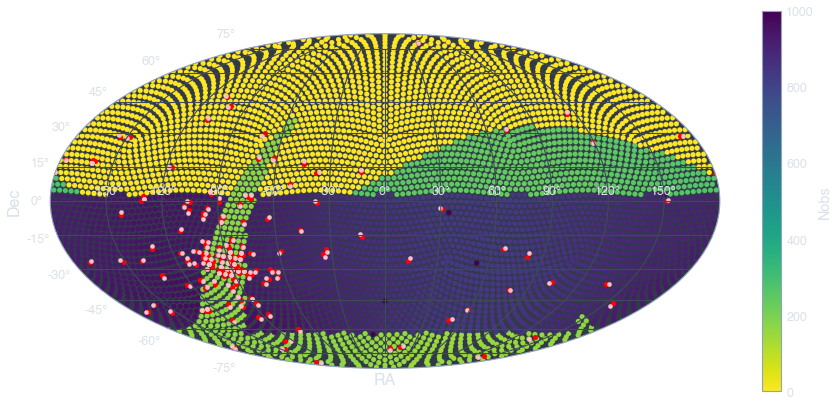

In [29]:
OpSimRAwrap = OpSimCoords.ra.wrap_at(180.*units.degree).degree
OpSimDecwrap = OpSimCoords.dec.wrap_at(180.*units.degree).degree

clusterRAwrap = clusterCoords.ra.wrap_at(180.*units.degree).degree
clusterDecwrap = clusterCoords.dec.wrap_at(180.*units.degree).degree

clusterCoordsO = SkyCoord(ra = GCout_df['OpSimRA[deg]'].values*units.degree, dec = GCout_df['OpSimDec[deg]'].values*units.degree)
clusterRAwrapO = clusterCoordsO.ra.wrap_at(180.*units.degree).degree
clusterDecwrapO = clusterCoordsO.dec.wrap_at(180.*units.degree).degree

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, figsize=(15,10))
ax.grid(True)
ax.set_xlabel("RA",fontsize=16)
ax.set_ylabel("Dec",fontsize=16)
mlw = ax.scatter(np.array(OpSimRAwrap).ravel()*np.pi/180., 
                 np.array(OpSimDecwrap).ravel()*np.pi/180., 
                 c=OpS.Nobs, #probably want this in a given filter, but that takes a long time to gather
                 cmap='viridis_r', s = 25, vmin=0, vmax=1000)
ax.scatter(np.array(clusterRAwrap).ravel()*np.pi/180., 
                 np.array(clusterDecwrap).ravel()*np.pi/180., color='red', s=25)
ax.scatter(np.array(clusterRAwrapO).ravel()*np.pi/180., 
                 np.array(clusterDecwrapO).ravel()*np.pi/180., color='pink', s=20)

cbar = f.colorbar(mlw, shrink=0.7)
cbar.set_label(r'Nobs')

print("mean RA GC", np.mean(GCout_df['OpSimRA[deg]'].values))
# #check M10
# M10 = GCout_df.loc[GCout_df['ID'] == 'NGC 6254']
# M10Coords = SkyCoord(ra = M10['RA[hr]'].values, dec = M10['Dec[deg]'].values, unit=(units.hour, units.degree))
# M10RAwrap = M10Coords.ra.wrap_at(180.*units.degree).degree
# M10Decwrap = M10Coords.dec.wrap_at(180.*units.degree).degree
# ax.scatter(np.array(M10RAwrap).ravel()*np.pi/180., 
#                  np.array(M10Decwrap).ravel()*np.pi/180., color='cyan', s=30)
# OpSM10Coords = SkyCoord(ra = M10['OpSimRA[deg]'].values, dec = M10['OpSimDec[deg]'].values, unit=(units.deg, units.degree))
# OpSM10RAwrap = OpSM10Coords.ra.wrap_at(180.*units.degree).degree
# OpSM10Decwrap = OpSM10Coords.dec.wrap_at(180.*units.degree).degree
# ax.scatter(np.array(OpSM10RAwrap).ravel()*np.pi/180., 
#                  np.array(OpSM10Decwrap).ravel()*np.pi/180., color='orange', s=30)


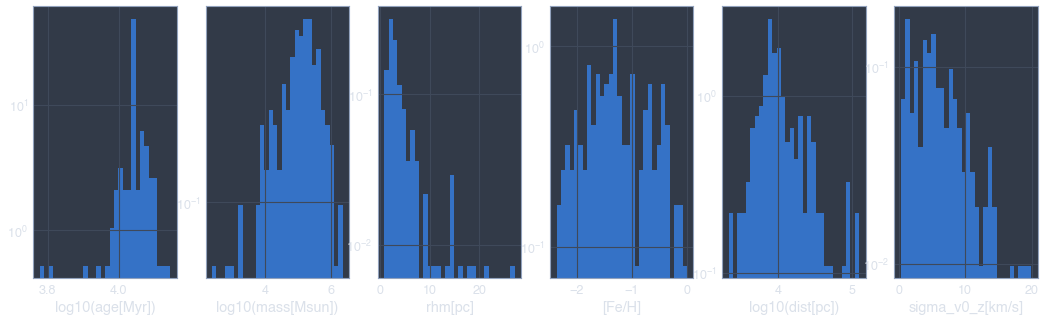

In [30]:
f,(ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(18,5))

ax1.hist(np.log10(GCout_df['age[Myr]'].values), bins=30, density=True)
ax1.set_xlabel('log10(age[Myr])')
ax1.set_yscale('log')

ax2.hist(np.log10(GCout_df['mass[Msun]'].values), bins=30, density=True)
ax2.set_xlabel('log10(mass[Msun])')
ax2.set_yscale('log')

ax3.hist(GCout_df['rhm[pc]'].values, bins=30, density=True)
ax3.set_xlabel('rhm[pc]')
ax3.set_yscale('log')

ax4.hist(GCout_df['[Fe/H]'].values, bins=30, density=True)
ax4.set_xlabel('[Fe/H]')
ax4.set_yscale('log')

ax5.hist(np.log10(GCout_df['dist[pc]'].values), bins=30, density=True)
ax5.set_xlabel('log10(dist[pc])')
ax5.set_yscale('log')

ax6.hist(GCout_df['sigma_v0_z[km/s]'].values, bins=30, density=True)
ax6.set_xlabel('sigma_v0_z[km/s]')
ax6.set_yscale('log')
